# 1. Philosophy, overview, commands, syntax

## 1.0 Entry poll

Please respond to the brief `entry survey` that helps us better understand what your needs might be in week one. I'll launch it on [zoom](https://jhjhm.zoom.us/j/98481767907) for both the in-person and virtual attendees. The questions are listed here for your convenience. An identical `exit survey` will be launched in week-five to get a sense of what we've achieved over a five-week period. Our goal is to "titrate" the challenges we present to you each week against your skill-level, to ensure a smooth process of [growth](https://jhufena.github.io/home/preface.html) (a.k.a, [flow)](https://en.wikipedia.org/wiki/Relaxation_(psychology)) over the next eight weeks.

### 1.0.1 Survey 

1. How will you use Stata from 04/01/2024-05/17/2024?        
     
   + Locally on my laptop
   + Remotely on another desktop or terminal         
     
2. What operating system will you use locally or remotely?      
         
   + MacOSX
   + Unix
   + Windows     

3. Do you have any experience using Stata, SAS, R, Python, or any other statistical software?     
     
   0. **No Experience.** I have no prior experience with Stata and am unfamiliar with the software. Also, I have no experience with other statistical software such as SAS, R, Python, etc.     
   1. **Basic Knowledge.** I have a general understanding of basic commands but I require asistance to perform tasks.
   2. **Novice User.** I am familiar with basic commands and can import data and do basic data cleaning. But I require guidance for more complex analyses.
   3. **Competent User.** I am proficient in using Stata, SAS, R, Python, etc. for data exploration, descriptive statistics, basic inference (t-tests, chi-square tests), and regression
   4. **Advanced User.** I can do multivariable regression and understand various statistical modeling options and techniques available in Stata, SAS, R, etc.
   5. **Expert User.** I can write custom programs, macros, ado-files in Stata. Or I am an expert user of SAS, R, Python, etc. but have little to no experience with Stata.

### 1.0.2 Results
Results of entry poll are [here](https://raw.githubusercontent.com/jhustata/basic/main/entry_poll.csv). And a detailed Stata analysis of these results can be found [here](entry_poll.md)

#### From a simulation
I planned the first two sessions of this class based on assumptions about your skill levels. One doesn't always have the luxury of real data. But decisions must be made.

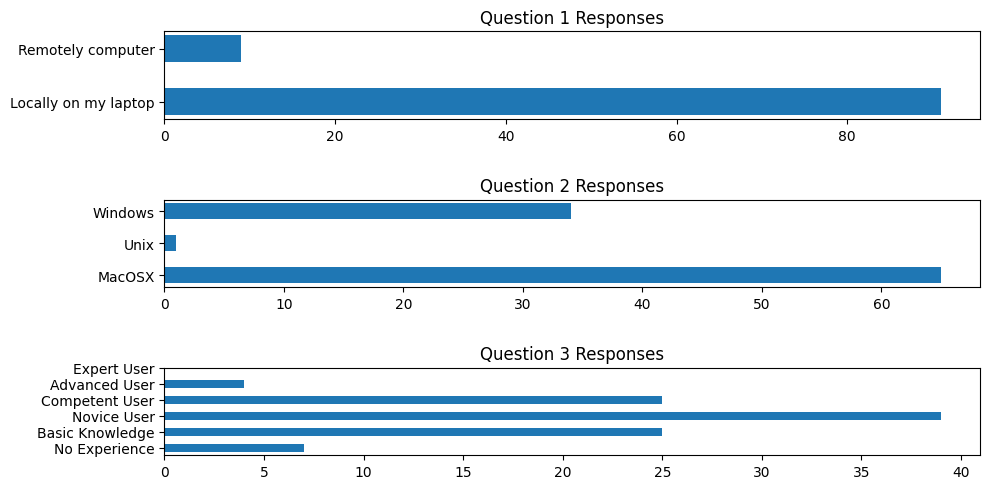

In [2]:
# House cleaning
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# Adjust the height of bars here
bar_height = 0.5

#
# Set the random seed for reproducibility
np.random.seed(0)

# Simulate responses for question 1 (Stata usage location)
q1_responses = np.random.choice(['Locally on my laptop', 'Remote computer'], 100, p=[0.9, 0.1])

# Simulate responses for question 2 (Operating system)
q2_responses = np.random.choice(['MacOSX', 'Unix', 'Windows'], 100, p=[0.67, 0.01, 0.32])

# Simulate responses for question 3 (Experience level)
# Assuming a mean experience level of 2 (Novice User) with a standard deviation of 1
q3_responses = np.random.normal(loc=2, scale=1, size=100)
# Ensure the experience level is within the 0 to 5 range and round to the nearest integer
q3_responses = np.clip(q3_responses, 0, 5).round().astype(int)

# Question 1
q1_values, q1_counts = np.unique(q1_responses, return_counts=True)
axs[0].barh(q1_values, q1_counts, height=bar_height)
axs[0].set_title('Question 1 Responses')
axs[0].set_xlabel(' ') # Number of Responses

# Question 2
q2_values, q2_counts = np.unique(q2_responses, return_counts=True)
axs[1].barh(q2_values, q2_counts, height=bar_height)
axs[1].set_title('Question 2 Responses')

# Question 3
q3_values, q3_counts = np.unique(q3_responses, return_counts=True)
axs[2].barh(q3_values, q3_counts, height=bar_height)
axs[2].set_title('Question 3 Responses')
axs[2].set_ylabel(' ') # Experience Level
axs[2].set_yticks(range(6))
axs[2].set_yticklabels(['No Experience', 'Basic Knowledge', 'Novice User', 'Competent User', 'Advanced User', 'Expert User'])

plt.tight_layout()
plt.show()


#### From zoom poll

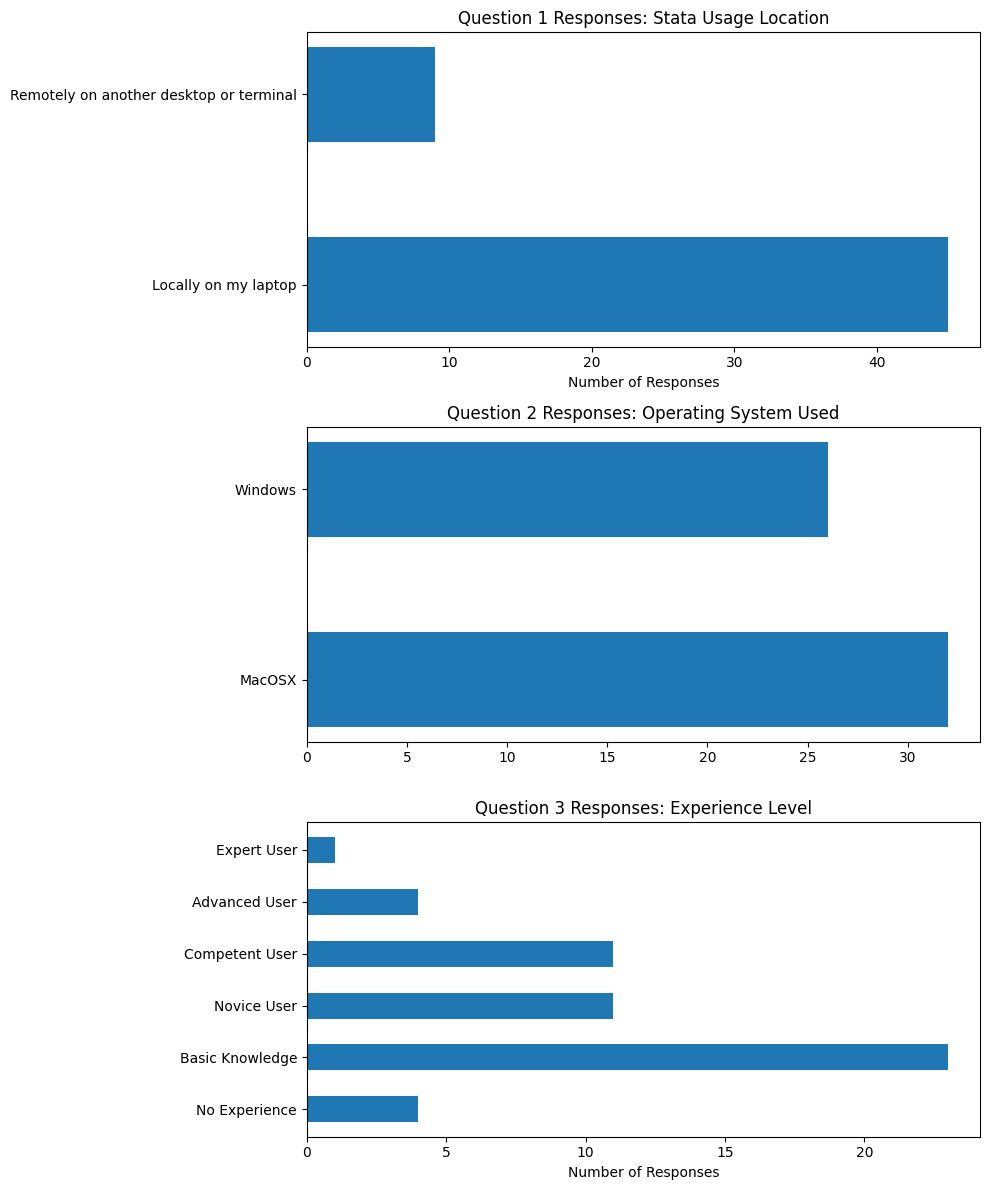

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import io

# Load the CSV file to examine its structure
url = 'https://raw.githubusercontent.com/jhustata/basic/main/entry_poll.csv'
data_path = '~/documents/github/stataone/entry_poll.csv'
survey_data = pd.read_csv(data_path)

# Data processing for visualization

# Question 1: Stata usage location
q1_data = survey_data['How will you use Stata from 03/26/2024-05/17/2024?']
q1_counts = q1_data.value_counts()

# Question 2: Operating system usage, handling multiple selections
# Splitting the responses on ';' and flattening the list
q2_data_split = survey_data['What operating system will you use locally or remotely?'].str.split(';').explode()
q2_counts = q2_data_split.str.strip().value_counts()

# Question 3: Experience level, translating text responses into numeric levels
experience_mapping = {
    'No Experience.': 0,
    'Basic Knowledge.': 1,
    'Novice User.': 2,
    'Competent User.': 3,
    'Advanced User.': 4,
    'Expert User.': 5
}

# Extract the first part of each response to map to the numeric values
q3_data_mapped = survey_data['Do you have any experience using Stata, SAS, R, Python, or any other statistical software?']\
                    .str.split('.').str[0] + '.'
q3_data_numeric = q3_data_mapped.map(experience_mapping)
q3_counts = q3_data_numeric.value_counts().sort_index()

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

bar_height = 0.5

# Question 1
axs[0].barh(q1_counts.index, q1_counts.values, height=bar_height)
axs[0].set_title('Question 1 Responses: Stata Usage Location')
axs[0].set_xlabel('Number of Responses')

# Question 2
axs[1].barh(q2_counts.index, q2_counts.values, height=bar_height)
axs[1].set_title('Question 2 Responses: Operating System Used')

# Question 3
axs[2].barh(q3_counts.index, q3_counts.values, height=bar_height)
axs[2].set_title('Question 3 Responses: Experience Level')
axs[2].set_xlabel('Number of Responses')
axs[2].set_yticks(range(6))
axs[2].set_yticklabels(['No Experience', 'Basic Knowledge', 'Novice User', 'Competent User', 'Advanced User', 'Expert User'])

plt.tight_layout()

# Instead of plt.show(), save the plot to a BytesIO object and display it inline
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
display(Image(buf.getvalue()))

# It's important to close the plt object to free up memory
plt.close(fig)




<details>
   <summary><b>GPT-4 Assisted Analysis</b></summary>

GPT-4 produced this analysis in less than a minute. It's virtually impossible for you to replicate that speed and accuracy, as we'll see [shortly](entry_poll.md)

   <iframe width="560" height="315" src="https://www.youtube.com/embed/pi6aJnoT8dM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

</details>

### 1.0.3 Understanding Format Specifiers: `%9s`

To seamlessly integrate external data into our analysis, let's start by importing a .csv file directly into Stata. Pay close attention to the variable types discussed in the following section: [Understanding Variable Types](https://jhustata.github.io/basic/chapter1.html#variable-types).

```stata
import delimited "https://raw.githubusercontent.com/jhustata/basic/main/entry_poll.csv", clear 
```

   - For a comprehensive guide on this command, type `help import delimited`.
   - Within *import_delimited_options*, focus on the "<u>varn</u>ames" option.
   - Consider this: if the first row of your dataset includes variable names, how should you proceed?

```stata
import delimited "https://raw.githubusercontent.com/jhustata/basic/main/entry_poll.csv", clear varn(1)
```

For those navigating Stata's syntax for the first time, remember that any argument following a comma is known as an `option`. This grants considerable flexibility in data importation, analysis, and output generation. As you develop your programming skills, you'll learn to offer similar flexibility to your users by incorporating customizable options into your scripts.

Can you challenge yourself to create a bar graph with the imported data? Data can be numeric or string – how do we determine the nature of our dataset?

```stata
describe
```

Identify the format of your variables. Need a hint? Revisit the section [1.2 Overview](https://jhustata.github.io/basic/chapter1.html#variable-types).

For a thorough analysis using Stata on this dataset, refer to [this detailed examination](entry_poll.md).


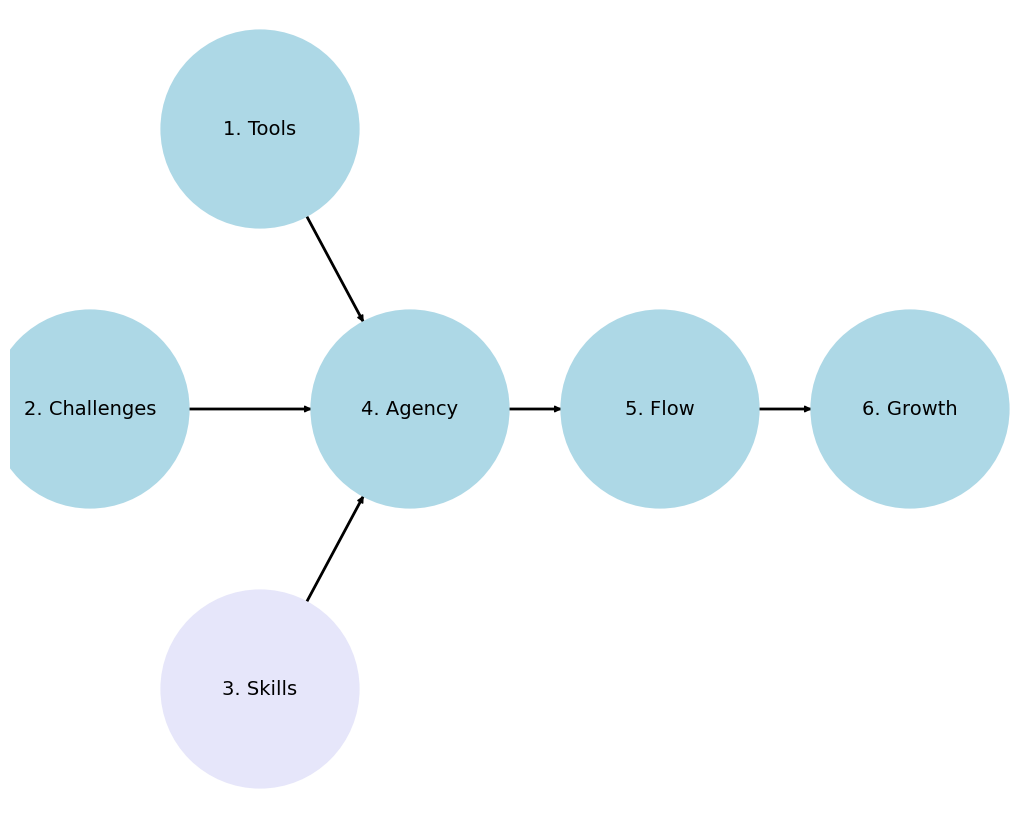

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("1. Root", pos=(-2500, 700))
G.add_node("2. Pentatonic", pos=(-4200, 0))
G.add_node("3. Diatonic", pos=(-2500, -700))
G.add_node("4. Chromatic", pos=(-1000, 0))
G.add_node("5. Temperament", pos=(1500, 0))
G.add_node("6. Expression", pos=(4000, 0))

G.add_edges_from([("1. Root", "4. Chromatic")])
G.add_edges_from([("2. Pentatonic", "4. Chromatic")])
G.add_edges_from([("3. Diatonic", "4. Chromatic")])
G.add_edges_from([("4. Chromatic", "5. Temperament")])
G.add_edges_from([("5. Temperament", "6. Expression")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"4. Chromatic": "4. Agency",
          "1. Root": "1. Tools",
          "2. Pentatonic": "2. Challenges",
          "3. Diatonic": "3. Skills",
          "5. Temperament": "5. Flow",
          "6. Expression": "6. Growth"}  # Added label for "NDI" node in the labels dictionary

# Update color for the "Scenarios" node
node_colors = ["lightblue","lightblue", "lavender", "lightblue", "lightblue", "lightblue"]
# node_colors = ["lightblue","lavender", "lavender", "lightgreen", "lightpink", "lightpink"]
# Suppress the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=14) # , font_weight='bold'
nx.draw_networkx_edges(G, pos, edge_color='black', style='solid', width=2)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")
plt.show()

## 1.1 Philosophy

In embarking on the journey of mastering Stata for data analysis and statistical programming, we adhere to a philosophy that is both pragmatic and reflective.  

### 1.1.1 Receive & with simplicity
1. Tools
   - Workstation
      - Remote: Terminal, [Safe Desktop](https://ictr.johnshopkins.edu/service/informatics/safe-desktop/)
      - Local: [Download](https://download.stata.com/download/) to your machine 
   - Installation  
      - download.stata.com
      - Username:  0123456789 (from email)
         - You'll use it again even with future purchases  
      - Password: `$3(re+` (your choice) 
      - Serial number (from purchase)
         - Perpetual license (expensive)
         - Subscription
            - 6 months
            - 12 month 
      - Operating system (Windows, Mac, Linux)
         - Contact Stata if you have other system
      - Package Stata/MP, Stata/SE, Stata/BE
         - e.g. Installed the parallel processing version for Mac, ado and help files, PDF documentation, tutorials, and support files. Requires a Stata/MP license 
      - Allow stata to access files in document folder 

   - Courses
      - 340.600 Stata Programming I (Basic)
      - 340.700 Stata Programming II (Intermediate)
      - `340.800 Stata Programming III (Advanced)`

2. Challenges
   - [Foundational](https://jhufena.github.io/home/intro.html)
      - Epi 750 series
      - Biostats 620 series
   - Hopkins
      - [Labs/Practice](https://jhustata.github.io/basic/quickrefs.html#labs-schedule)
      - Homework
      - Capstone/Thesis
      - Biostats 140.624
   - Real-World
      - [NHANES](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx)
         - Demographic
         - Questionnaire
         - Nutrition
         - Lab
         - Exam
         - Outcomes (30-year followup)
            - Mortality
            - Kidney failure
      - National Databases
      - Clinical Studies
      - Longitudinal Cohorts
   
### 1.1.2 Know & be reverent
3. **Skills**
   - **Analytical Thinking:** You are encouraged to not just learn Stata syntax but to understand the data you are working with. Stata is not just a tool but a gateway to meaningful insights. This class assumes that you have received some training in epidemiology and biostatistics and will not be emphasizing any of these points.
   - **Data Management Mastery:** Knowing how to efficiently clean, manipulate, and prepare data is sacred in the realm of statistical analysis. Treat each [dataset as a unique puzzle](https://jhustata.github.io/basic/quickrefs.html#datasets-and-supplementary-materials) that tells a story. I've two datasets that have the same information, but in different formats. From a technical perspective, there might be nuanced differences in the challenges you'll encounter while using one dataset compared with another.
      - [transplants.txt](https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt)
      - [transplants.dta](https://jhustata.github.io/basic/_downloads/34a8255f06036b44354b3c36c5583d7e/transplants.dta)
   - **Statistical Techniques:** A reverent understanding of the statistical methods behind the commands is crucial but beyond the scope of this class. For instance, we will not discuss the relative merits of three approaches to survival analysis: non-parametric, semi-parametric, and parametric. This class assumes you know why and when to use each method. But we will provide you with the tools to do so efficiently.
4. **Agency**
   - **Self-directed Learning:** We hope you appreciate the value of exploration beyond the classroom. The most profound learning occurs through tackling real-world data challenges.
   - **Community Contribution:** Please engage with our new [Stata-focused community](https://github.com/jhufena/discussions/discussions), share knowledge, ask questions, and contribute solutions. Respect for the community's collective wisdom and the software's capabilities should guide your interactions.

### 1.1.3 Do & on time
5. **Flow**
   - **Start with the Basics:** [This class](https://publichealth.jhu.edu/course/38901), as it's name suggests, emphasizes the importance of a strong foundation. Understanding the `basics` thoroughly ensures smoother progression to `intermediate` and `advanced` topics.
   - **Practical Applications:** If you need a real-world dataset (e.g. NHANES) for your Biostats 140.624 project, we'd be happy to facilitate you and help curate it for you. Hopefully this will foster a deeper understanding and appreciation of Stata's power.
   - **Iterative Learning:** Please use an iterative approach to all your labs and homeworks. The first attempt doesn't have to be perfect; learning comes from refinement and persistence.
6. **Growth**
   - **Feedback Loops:** Constructive feedback is sacred. So we are offering an [open environment](https://github.com/jhufena/discussions/discussions) where feedback is given and received, to promote continuous improvement and learning.
   - **Skill Expansion:** The course is structured to progressively challenge you with more complex problems and datasets. Growth in the realm of Stata Programming, and in any aspect of life in general, is about matching challenges with skills. But gradually and systematically increasing the challenges we present to you, and by offering you prompt feedback on your performance, we believe we'll nurture an environemnt that ensures growth in your skills.
   - **Lifelong Learning:** And remember that learning Stata, like any other skill, is a journey without an end. The landscape of data analysis is always evolving, and so should your skills and understanding. This is partly what motivated our new [Stata-focused community](https://github.com/jhufena/discussions/discussions) as well as our [general analytic community](https://jhufena.github.io/home/intro.html) that aims to discuss topics at the interface of Stata, R, Python, AI, code, version control, automation, open science, etc.




## 1.2 Overview &#129408;
     
*Ceci n'est pas une crabe* 

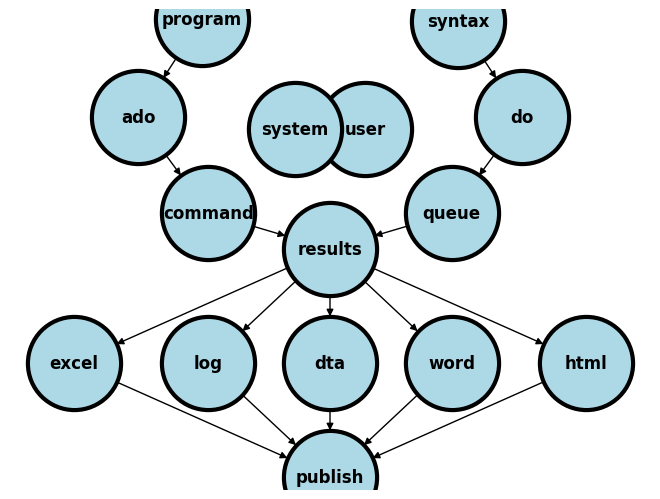

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

### 1.2.1 User vs. system

We are going to distinguish between two fundamental perspectives in this class:
 
+ System
   + Native (built-in stata application, support files, `.ado` files)
      + If you type `which help` into your command window you get something like: `/Applications/Stata/ado/base/h/help.ado`
   + [Third-party](https://raw.githubusercontent.com/jhustata/basic/main/table1_fena.ado) (typically `.ado` files)
      + When I type `which table1_fena` I get `/Applications/Stata/ado/base/t/table1_fena.ado`
   + Your `.ado` files (you'll learn to write & install your own programs)  
      + Since you don't have `table1_fena.ado` installed you'll get `command table1_fena not found as either built-in or ado-file`  
        
+ User
   + Known
      + Instructor
      + Teaching assistants
      + Students
      + Collaborators

   + Unknown
      + Anticipate (emphathize with different kinds of users)
      + Share code (on GitHub, for instance)
      + Care (user-friendly, annotated code)

The `system` is the <u>Stata application</u> and its a simple noun. It is not <strike>STATA</strike>, which gives the impression of being an acronym. I presume you’ve all installed Stata onto your local machines. If not I presume you’ll be doing so very soon or you will be remotely accessing it. The `user` includes you, me, the teaching assistants, collaborators, or strangers.

As a user, you will or have already downloaded and installed a system of programs, mostly ado-files, which form the foundation of all the commands you will be using in Stata. These are the **native** Stata system files.

But soon you will begin to write your own Stata programs or `.ado` files and install them into the system folders (as I've done with `table1_fena.ado`). Then, it will be helpful to think of your role as part of the system. In your new role as system, it will be helpful to anticipate the needs of the known and unknown future users of your program. This will call for **empathy** (anticipating user needs), **sharing** (your code with others), and **caring** (that its user-friendly).

### 1.2.2 Interface
       
+ Installation
   + Local
      + MacOSX
      + Unix
      + Windows

   + Remote
      + Desktop
         + Windows
      + Cluster
         + Unix/Terminal
     
+ Local
   + [Menu](https://www.stata.com/manuals13/gsw2.pdf#gsw2TheStatauserinterface)
      + file 
      + edit
      + view
      + data 
      + graphics
      + statistics
      + user
      + window
         + command &#8984; 1
         + results &#8984; 2
         + history &#8984; 3
         + variables &#8984; 4
         + properties &#8984; 5
         + graph &#8984; 6
         + viewer &#8984; 7
         + editor &#8984; 8
         + do-file &#8984; 9
         + manager &#8984; 10
      + help

   + Command     
      + The very first `valid` word you type into the command window or on a line of code in a do file
         - Some [basic](https://www.stata.com/manuals13/u27.pdf) commands that the folks at Stata think you ought to know by the end of this class. Please keep checking 
         - In your week 1 [homework](https://jhustata.github.io/basic/chapter1.html#homework) you'll learn to use the `display` command
      + Rendered blue in color if its a <u>native</u> Stata command (on my machine)
      + A <u>third-party</u> program/command appears white and may not work if you share your do file with others
      + Your collaborators, TAs, and instructors must be warned about the need to first install such third-party programs     
           
   + Syntax
      + The arrangement of words after a Stata command
      + Create well-formed instructions in Stata (i.e., the syntax of Stata)
      + Other terms or synonyms include code, Stata code, code snippet.        
           
   + Input
      + Menu (**see above:** a menu-driven task outputs command and syntax in the results window)
      + do files (Stata script with a sequence of commands; you can copy & paste some from the results window)
      + ado files (Stata script with a program or a series of programs for specific or general tasks)      

 ### 1.2.3 Variable types    
   + Output/Results   
      + String   
         + text (e.g., `str49` below = string of 49 characters <u>including spaces</u>) 
            + `The median age in this population is 40 years old`
         + url 
            + `https://www.stata-press.com/data/r8`
         + filepath 
            + `/users/d/desktop`
              
      + Numeric (types by range)
         + integer
            + `byte`: $-127$ to $100$ 
            + `int`: $-32767$ to $32740$
            + `long`: $\pm   2$ billion
         + decimal
            + `float`: $\pm   10^{38}$ billion
            + `double`: $\pm   10^{307}$ billion


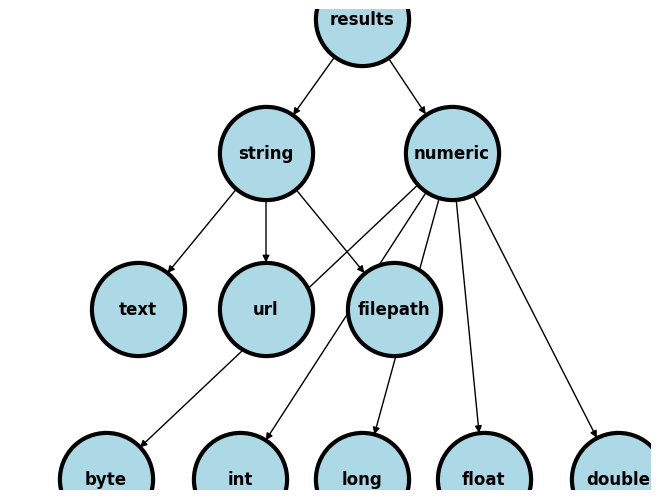

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("results", pos = (500,960))
G.add_node("string", pos = (-1000, 400) )
G.add_node("numeric", pos = (1900, 400) )
G.add_node("text", pos = (-3000, -250) )
G.add_node("url", pos = (-1000, -250) )
G.add_node("filepath", pos = (1000, -250) )
G.add_node("long", pos = (500, -960))
G.add_node("int", pos = (-1400, -960))
G.add_node("byte", pos = (-3500, -960))
G.add_node("float", pos = (2400, -960))
G.add_node("double", pos = (4500, -960))
G.add_edges_from([ ("results","string")])
G.add_edges_from([("string", "text"),("string", "url") ,("string", "filepath")])
G.add_edges_from([("numeric","byte"),("numeric","float"),("numeric","double"),("numeric","int")])
G.add_edges_from([("numeric","long"),("results","numeric")])

nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

 ### 1.2.4 Final products
   + Embed
      + Results window
      + Graph
      + File: excel, log, dta, word, [html](dyndoc.md), etc.

   + Publish/[Markup](https://en.wikipedia.org/wiki/Markup_language)
      + Self (e.g., GitHub)
      + Journal (e.g. JAMA)
      + Commercial (e.g. Pfizer Ad)

Let's use a simple example to illustrate some of the terms we've introduced:

+ Menu 
   + file > example datasets > lifeexp.dta > use
   + `sysuse lifeexp.dta`
   + `webuse lifeexp.dta`
   + `use https://www.stata-press.com/data/r8/lifeexp.dta`    


+ do file
   + Importing data
   + Exploring data 
   + Analyzing data
   + Outputing results
       
+ ado file
   + basis of Stata commands
+ etc.
   + In the `Basic` class we'll emphasize .log file and .xlsx as our key output products
   + However, we'll demonstrate how to output .dta, .docx, .html as well 

## 1.3 Commands

Let's instruct Stata to import some data:

```stata
webuse lifeexp, clear
```

```stata
. webuse lifeexp, clear
(Life expectancy, 1998)

. 
```

The results window has some output informing us that we've imported Life expectancy data from 1998. Now let's explore these imported data:

```stata
display c(N) 
display c(k)
describe 
```

```stata
. display c(N) 
68

. display c(k)
6

. describe 

Contains data from https://www.stata-press.com/data/r18/lifeexp.dta
Observations:            68                  Life expectancy, 1998
Variables:                6                  26 Mar 2022 09:40
(_dta has notes)
		
Variable      Storage   Display    Value
name            type    format     label      Variable label
		
region          byte    %16.0g     region     Region
country         str28   %28s                  Country
popgrowth       float   %9.0g               * Avg. annual % growth
lexp            byte    %9.0g               * Life expectancy at birth
gnppc           float   %9.0g               * GNP per capita
safewater       byte    %9.0g               * Safe water
* indicated variables have	notes
		
Sorted by: 

. 
```

By now you should be quick to point out that `display` is a command. To better understand what this command does, you can type `help display` in the command window. If you do so, you'll learn the following:

```stata
[P] display	--	Display strings and values of scalar expressions
			(View complete PDF manual entry)
```


In our earlier discussion, we covered two main types of data output in Stata: string and numeric values. The `display` command is used to show these values, formatted according to the syntax you specify.

Data outputs generally have two main features:

- **Name**: For example, `c(N)` refers to the number of observations, and `c(k)` refers to the number of variables.
- **Content**: This is the actual value associated with the name, such as the actual number of observations and variables.

These are examples of what are known as macros. Specifically, they are system-defined macros. We will also explore user-defined macros, which you can create yourself, in our next session.

Now, let's practice some basic data analysis with our imported dataset to understand more about Stata syntax and outputs. We'll go through each line of code and add explanations:

```stata
webuse lifeexp, clear 
encode country, gen(Country)
twoway scatter lexp Country, xscale(off)
graph export lexp_bycountry.png, replace 
```

1. **Loading the Data**: `webuse lifeexp, clear`
   - This command loads a dataset named `lifeexp` into Stata. The `clear` option is used to ensure that any previously loaded data is removed from memory, making room for this new dataset.

2. **Creating a New Variable**: `encode country, gen(Country)`
   - Here, we're taking the `country` variable, which contains country names, and converting it into a new numeric variable named `Country`. This process assigns a unique number to each country name, making it easier to work with in statistical analyses.

3. **Generating a Scatter Plot**: `twoway scatter lexp Country, xscale(off)`
   - This line of code creates a scatter plot with life expectancy (`lexp`) on one axis and the newly created `Country` variable on the other. The `xscale(off)` part means we're not scaling the x-axis, keeping it in its original state for clarity.

4. **Exporting the Graph**: `graph export lexp_bycountry.png, replace`
   - Finally, this command saves the scatter plot as an image file named `lexp_bycountry.png`. The `replace` option allows the file to be overwritten if it already exists, ensuring your latest graph is saved.

By following these steps, you're performing a basic yet insightful analysis of your data, exploring the relationship between countries and life expectancy. This hands-on approach will help you become more familiar with Stata's syntax and how to interpret the outputs of your analyses.


![](lexp_bycountry.png)


```stata
. webuse lifeexp, clear 
(Life expectancy, 1998)

. encode country, gen(Country)

. twoway scatter lexp Country, xscale(off)

. graph export lexp_bycountry.png, replace 
file /Users/d/Desktop/lexp_bycountry.png saved as PNG format

. 
```



## 1.4 Syntax

A few commands are useful on their own: 

```stata
chelp
pwd
```

To name but a few. But the vast majority of commands will only work in context of the appropriate syntax. In this example below, the command `clear` is useful on its own. But `set` only becomes useful with additional syntax. Here we have `obs 1000`, instructing Stata to create an empty dataset with 1000 observations. The command `generate` with syntax `bmi=rnormal(28,5)` then instructs Stata to create a new variable `bmi` in a simulation of a random sampling process with replacement, 1000 times over, from a population with mean bmi of 28 and standard deviation of 5. Stata is then instructed to create a histogram of these simulated bmi sample and save the figure as a .PNG image. Hopefully this clarifies what a Stata command is and what syntax is. Together these make up Stata code.    

```stata
 clear 
 set obs 1000
 generate bmi=rnormal(28,5)
 histogram bmi, normal
 graph export bmi.png, replace 
```

```stata

.  clear 

.  set obs 1000
Number of observations (_N) was 0, now 1,000.

.  generate bmi=rnormal(28,5)

.  histogram bmi, normal
(bin=29, start=13.457429, width=.99248317)

.  graph export bmi.png, replace 
file /Users/d/Desktop/bmi.png saved	as	PNG	format

. 
end of do-file

. 
```

![](bmi.png)

In the above example the very first `valid` word is a command and is rendered blue on my machine but purple in this book. If you type any random word that has no corresponding ado-file, you'll get an error message. Notice also that since its not a native Stata command, it appears black (or white), but not purple.

```stata
myfirstprogram
```

```stata
. myfirstprogram
command myfirstprogram is unrecognized
r(199);

. 

```

The words that come after the command might be further commands or subcommands. If so, they'll also be rendered blue on my machine. The ones that appear in white or black (dark or light mode) are either third-party programs/commands or they are part of the Stata syntax. By the end of next week you'll be writing your first program (which becomes a Stata command). And by week three you'll be adding requirements for syntax, which introduces <u>user-defined</u> input[.](./lab1sol.md) 

## 1.5 Lab

data: [transplants.dta](https://jhustata.github.io/basic/_downloads/34a8255f06036b44354b3c36c5583d7e/transplants.dta)

Please use this lab as an opportunity to review the course material and prepare yourself for the homework 1 & 2 questions. An answer key will be on Friday April 5, 2024. Question `14` will prepare you for homework 1.

1. Start Stata and open your do-file editor. 

2. You will now write your first do-file following the guidelines given in [lecture1.do](https://raw.githubusercontent.com/jhustata/basic/main/lecture1.do). 

3. We want to load `transplants.dta`. You may do so directly from the class website using a URL. Alternatively, you may download this file onto your local machine. In the latter case, let’s check your working directory. See the bottom left side of the console (the main Stata window). You may also type `pwd` on the console. Is it where your `transplants.dta` is located? If not, use one of these two methods:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a) Next time, launch Stata by double-clicking on `transplants.dta`.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b) Type `cd c:\your\actual\path` (windows OS) on the console (NOT in your do file). In class and on my Mac OS my directory was `/Users/d/desktop`
    
4. Now let’s get back to your do file. Load `transplants.dta` (double-click on the file or type `use transplants.dta, clear`)

5. How many observations does the dataset have? 

6. How many adults (age>18) does the dataset have?

7. How many observations have missing bmi?


8.  Generate a new variable called agecat. The value of agecat is 1 for patients younger than 18, 2 for those from 18 to 65, and 3 for those older than 65.

9. What are the means of age and bmi?


10. Now preserve your dataset (type `help preserve` to learn more).

11. Drop all patients who are younger than 18 or older than 65, or have missing value for age.

12. Again, what are the means of age and bmi? restore the dataset. Yet again, what are the means of age and bmi?

13. What happened? Leave a comment on your do-file explaining what you just did. Remember, your homework (and all other) .do file scripts should have 1-3 comments per block of code. Do not use your comments/annotation to define the Stata commands you've used. Thats what the `help` command is for. Instead, give yourself or a reader some context.

14. Lab 1 is almost over. Let Stata say "that was easy!"

15. The last bit. Close your log file. Never forget to close log files! If you hadn't created a log file, this is a reminder to do so.  

16. You have all your commands so far in your do file, right? Run your entire do file and make sure your do file does exactly the same thing.


## 1.6 Homework  

Your week 1 homework is very simple:
1. Write a .do file which imports data from [hw1.tx](https://github.com/jhustata/basic/raw/main/hw1.txt)
2. Name it `hw1.lastname.firstname.do`
3. It should create a .log file called `hw1.lastname.firstname.log`
4. Make sure your log file displays only the output of interest
5. But do not submit your log file as part of the assignment
6. Evaluation will be based on the .log file produced when we run your script on our machines

Question: 

Print the following sentence: `Question 1: There are xxxx records in the dataset`. The `xxxx` should be replaced with the actual number of records in the dataset.

If you are not sure where the `backquote` is, its to the left of "1" on most keyboards. The forwardquote is to the left of "return" on a Mac. You need to get familiar with these quotes, since they'll be used to specify "macros" throughout this class and your programming life. While using a .do file, the use of a back quote will automatically generate a forward quote to enclose the specified macro as seen below.

```stata
di `c(N)'
```


![](https://media.istockphoto.com/id/168823323/photo/modern-laptop-computer-keyboard.jpg?s=2048x2048&w=is&k=20&c=1EUUYqgTO1bRR5wqebm56g5xV4R69LKcK5LQtSwbnd8=)